## Mount GCP bucket in colab

In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list

In [3]:
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key is deprecated. Manage keyring files in trusted.gpg.d instead (see apt-key(8)).
100  2659  100  2659    0     0  24782      0 --:--:-- --:--:-- --:--:-- 24850
OK


In [4]:
!apt -qq update

19 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: http://packages.cloud.google.com/apt/dists/gcsfuse-bionic/InRelease: Key is stored in legacy trusted.gpg keyring (/etc/apt/trusted.gpg), see the DEPRECATION section in apt-key(8) for details.


In [5]:
!apt -qq install gcsfuse

gcsfuse is already the newest version (1.2.0).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [6]:
!mkdir colab_direcoty

mkdir: cannot create directory ‘colab_direcoty’: File exists


In [7]:
!gcsfuse --implicit-dirs radiq-app-data colab_direcoty

{"time":"26/09/2023 03:58:06.293900","severity":"INFO","msg":"Start gcsfuse/1.2.0 (Go version go1.21.0) for app \"\" using mount point: /content/colab_direcoty\n"}


In [8]:
!ls colab_direcoty/ms_cxr/

downsized	      MS_CXR_Local_Alignment_v1.0.0.csv  test	val
label_1024_split.csv  raw				 train


# EDA

In [9]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import pandas as pd
import numpy as np
import textwrap

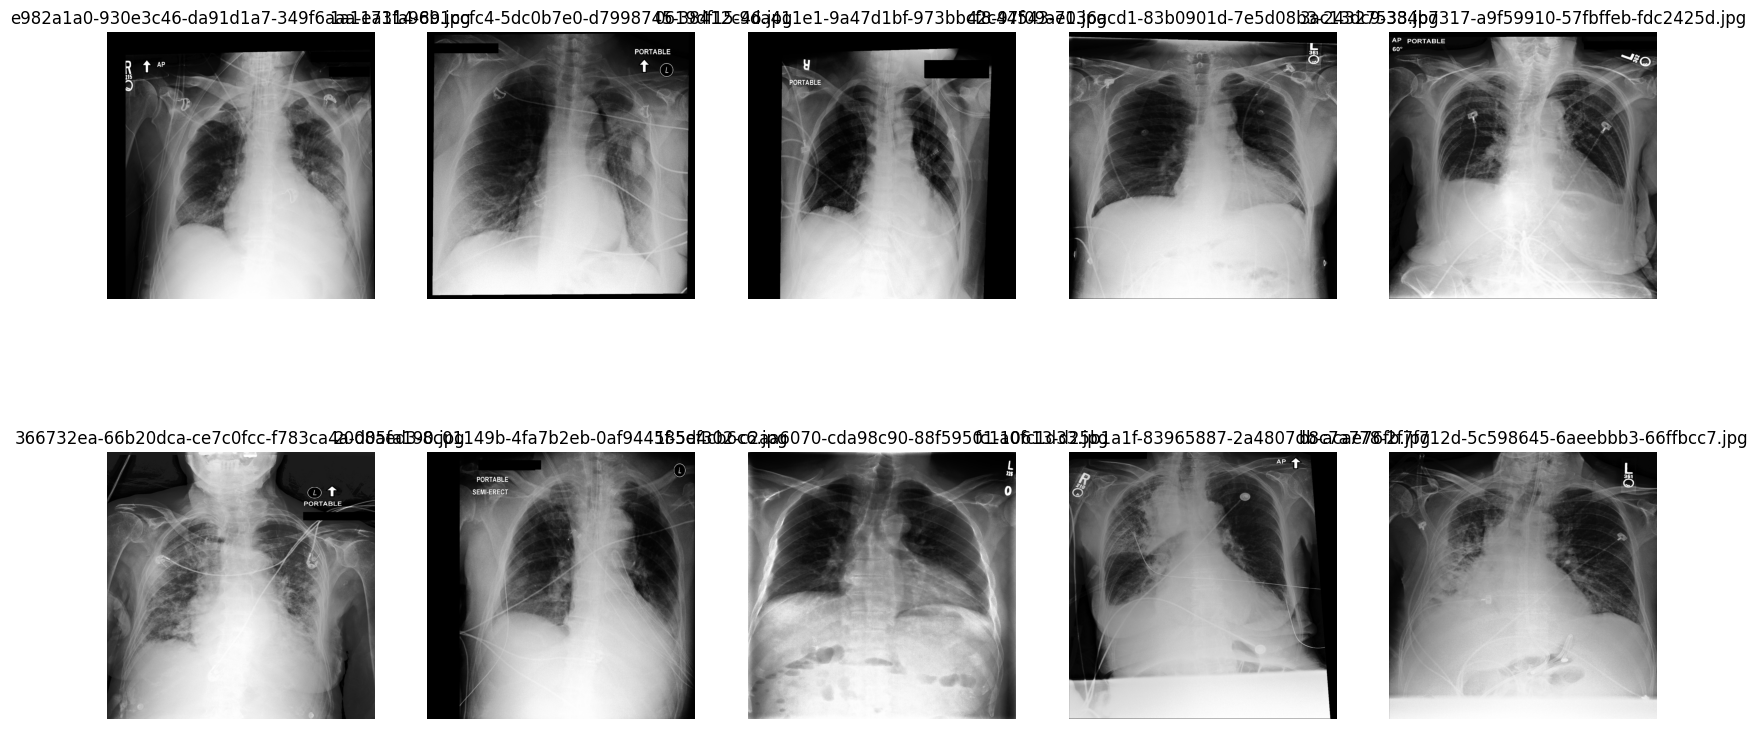

In [10]:
dir_name = "colab_direcoty/ms_cxr/train"

files = [os.path.join(dir_name, file) for file in os.listdir(dir_name) if file.endswith(".jpg")]

random.seed(42)
selected_files = random.sample(files, 10)

fig = plt.figure(figsize=(20, 10))

for i, file in enumerate(selected_files):
    img = Image.open(file)
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(img)
    ax.set_title(os.path.basename(file))
    ax.axis('off')

plt.show()



In [11]:
df = pd.read_csv("colab_direcoty/ms_cxr/label_1024_split.csv")
print(len(df))
df.head()

1448


,dicom_id,category_name,label_text,path,x,y,w,h,image_width,image_height,split
0,675d792f-a3521e48-5eec8573-1e81d644-e60c34f8,Pneumonia,Bibasilar opacities,files/p10/p10233088/s54276838/675d792f-a3521e4...,113,575,308,159,1024,1024,train
1,675d792f-a3521e48-5eec8573-1e81d644-e60c34f8,Pneumonia,Bibasilar opacities,files/p10/p10233088/s54276838/675d792f-a3521e4...,584,574,284,177,1024,1024,train
2,5318d353-daae9c3d-2ee8648e-32b65198-aeff801e,Pneumonia,Bilateral multifocal areas of consolidation,files/p10/p10123147/s50230934/5318d353-daae9c3...,608,425,304,267,1024,1024,val
3,5318d353-daae9c3d-2ee8648e-32b65198-aeff801e,Pneumonia,Bilateral multifocal areas of consolidation,files/p10/p10123147/s50230934/5318d353-daae9c3...,183,231,256,224,1024,1024,val
4,4decce85-c6ede74e-7a8bc81c-e81edee9-5ec17116,Pneumothorax,Large right-sided pneumothorax,files/p10/p10500801/s58577720/4decce85-c6ede74...,88,36,294,884,1024,1024,test


In [12]:
df.describe()

,x,y,w,h,image_width,image_height
count,1448.000000,1448.000000,1448.000000,1448.000000,1448.0,1448.0
mean,361.569751,413.730663,318.537983,265.684392,1024.0,1024.0
std,218.795097,172.107930,142.390660,135.668456,0.0,0.0
min,0.000000,2.000000,44.000000,29.000000,1024.0,1024.0
25%,173.750000,286.750000,218.000000,161.000000,1024.0,1024.0
50%,323.000000,445.500000,286.500000,250.000000,1024.0,1024.0
75%,579.000000,536.000000,400.250000,339.000000,1024.0,1024.0
max,878.000000,839.000000,749.000000,884.000000,1024.0,1024.0


In [13]:
df["label_text"].value_counts()

enlarged cardiac silhouette                                 83
cardiac silhouette is enlarged                              76
moderate cardiomegaly is present                            22
mild cardiomegaly                                           20
cardiomegaly noted                                          17
                                                            ..
left-sided remaining pneumothorax                            1
small focal area of consolidation in the lingular region     1
opacification at the left base                               1
multisegmental right upper lobe consolidation is present     1
interstitial edema is present in the right lower lung        1
Name: label_text, Length: 715, dtype: int64

In [14]:
df["category_name"].value_counts()

Cardiomegaly        333
Pneumothorax        264
Pneumonia           231
Consolidation       185
Pleural Effusion    142
Lung Opacity        108
Atelectasis          98
Edema                87
Name: category_name, dtype: int64

In [16]:
df_train = df.query('split == "train"')

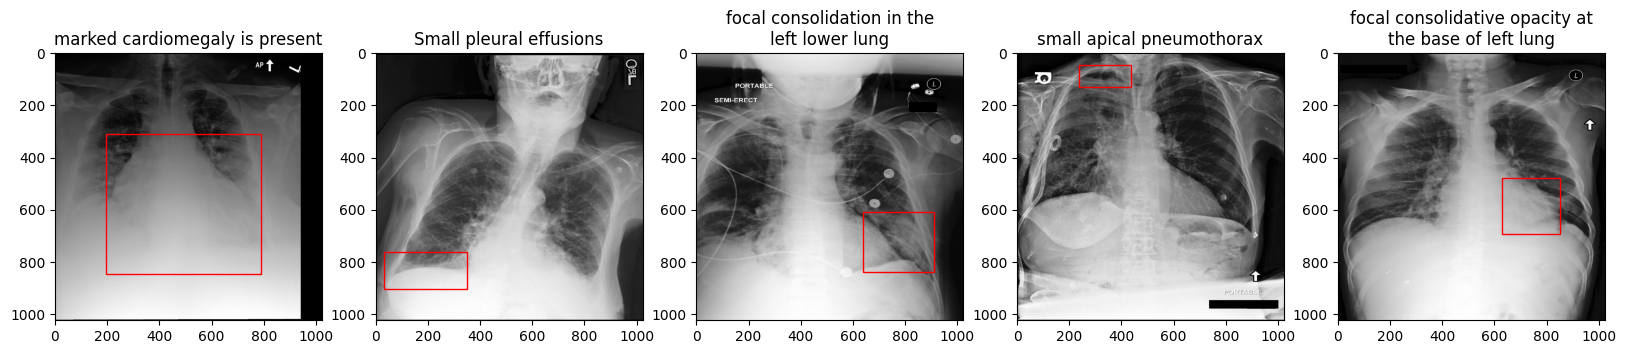

In [17]:
df_sample = df_train.sample(5, random_state=42)
fig = plt.figure(figsize=(20, 10))

for i, row in enumerate(df_sample.itertuples()):
    img_path = f"{dir_name}/{row.dicom_id }.jpg"
    img = Image.open(img_path)
    ax = fig.add_subplot(1, 5, i+1)
    ax.imshow(np.array(img), cmap='gray')
    rect = patches.Rectangle((row.x, row.y), row.w, row.h, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    # ax.set_title(row.label_text)

    wrapper = textwrap.TextWrapper(width=30)  # it will wrap the text at 30 characters
    word_list = wrapper.wrap(text=row.label_text)
    label_new = '\n'.join(word_list)
    ax.set_title(label_new)


plt.show()
